In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задача 1
Постройте график\
Назовите график\
Сделайте именование оси x и оси y\
Сделайте выводы

## 1.1. Скачать следующие данные: kc-house-data и laptop_price

In [3]:
df = pd.read_csv('kc-house-data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2. Изучите стоимости недвижимости

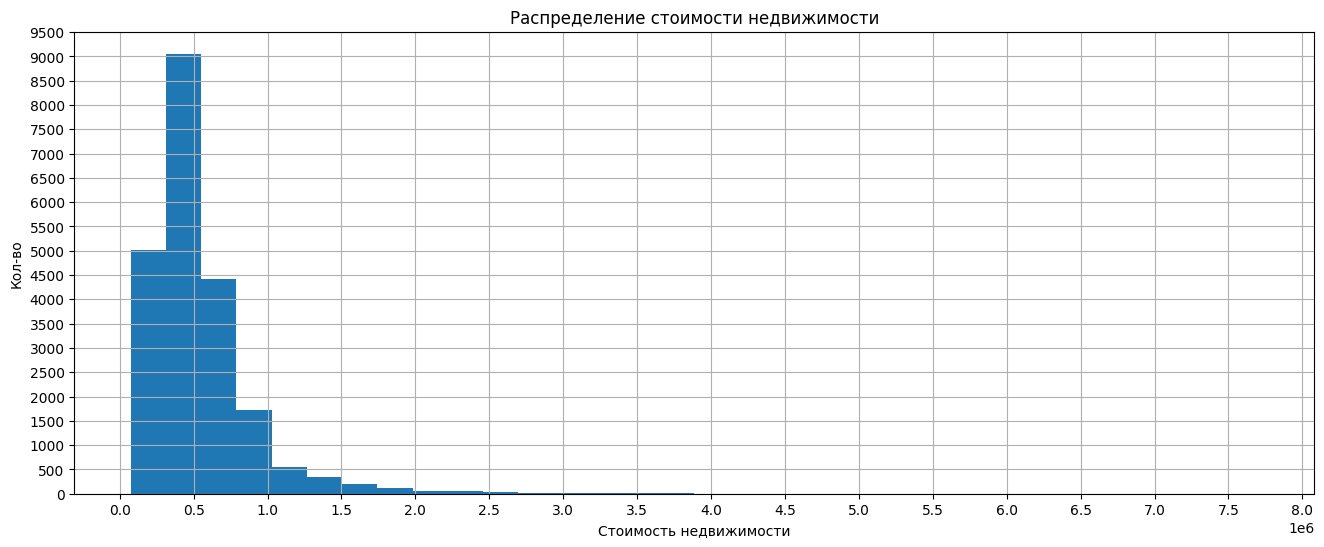

In [4]:
plt.figure(figsize=(16,6))
plt.hist(df['price'], bins=32)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Кол-во')
plt.xticks(np.arange(0, 8000001, 500000))
plt.yticks(np.arange(0, 9501, 500))
plt.grid();

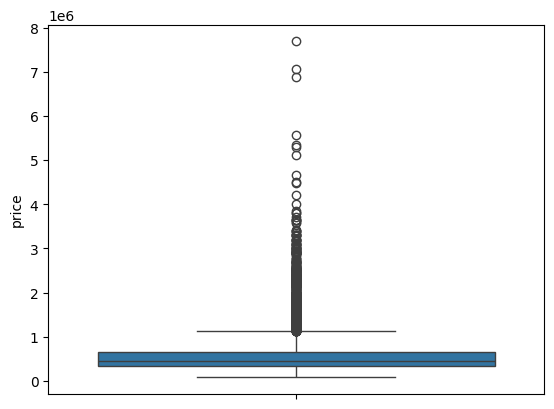

In [5]:
sns.boxplot(df['price']);

Вывод: подавляющее большинство домов оценивается приблизительно в 500 000 у.е. Имеются единичные случаи крайне высокой стоимости дома

## 1.3. Изучите распределение квадратуры жилой

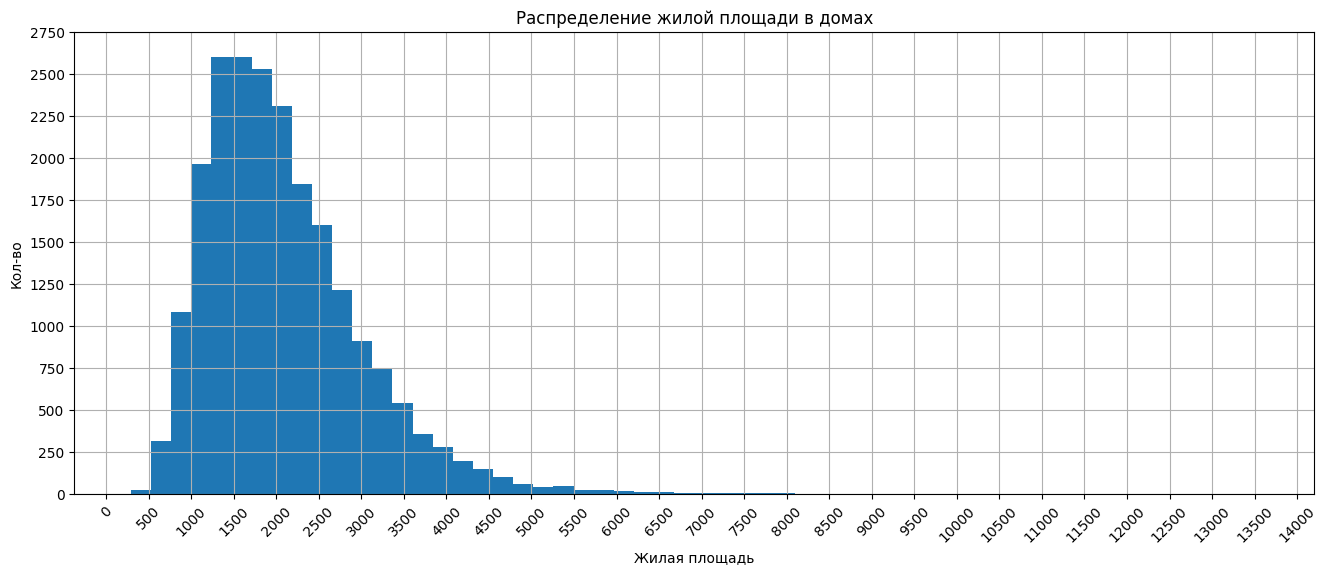

In [6]:
plt.figure(figsize=(16,6))
plt.hist(df['sqft_living'], bins=56)
plt.title('Распределение жилой площади в домах')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во')
plt.xticks(np.arange(0, 14001, 500), rotation=45)
plt.yticks(np.arange(0, 2751, 250))
plt.grid();

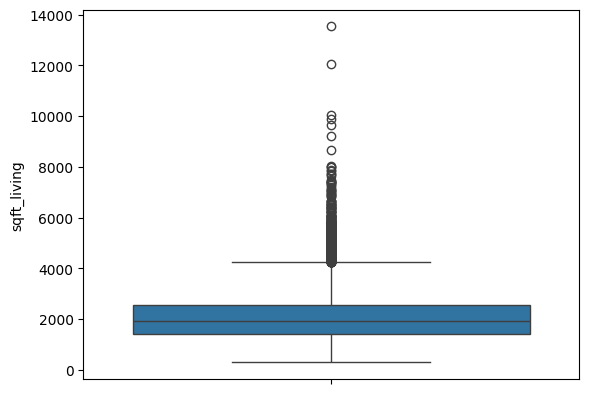

In [7]:
sns.boxplot(df['sqft_living']);

Вывод: В большинстве домов значение жилой площади находится на диапазоне от 1000 до 2500 футов. Имеются выбросы

## 1.4. Изучите распределение года постройки

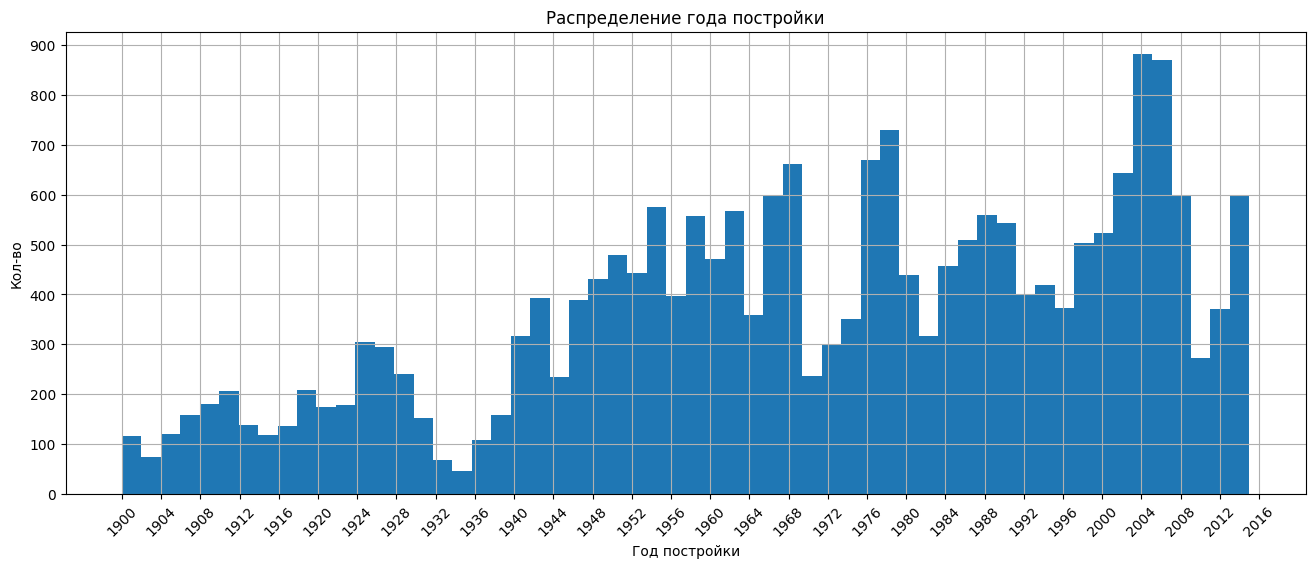

In [8]:
plt.figure(figsize=(16,6))
plt.hist(df['yr_built'], bins=58)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во')
plt.xticks(np.arange(1900, 2017, 4), rotation=45)
plt.yticks(np.arange(0, 901, 100))
plt.grid();

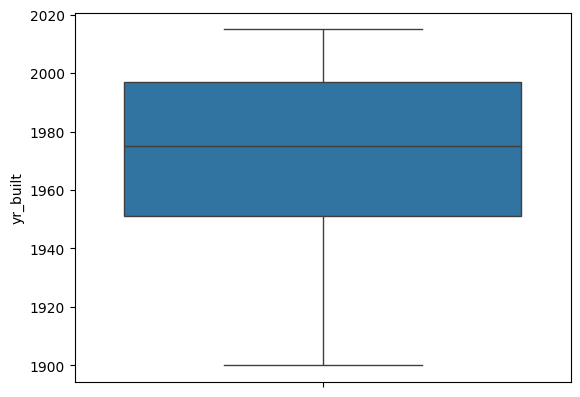

In [9]:
sns.boxplot(df['yr_built']);

Вывод: модовое значение выпадает на 2004 год. Выбросы отсутствуют

# 2 задача
Постройте график\
Сделайте выводы

## 2.1. Изучите распределение домов от наличия вида на набережную

In [25]:
WaterfrontView = df.waterfront.value_counts()
WaterfrontView

waterfront
0    21450
1      163
Name: count, dtype: int64

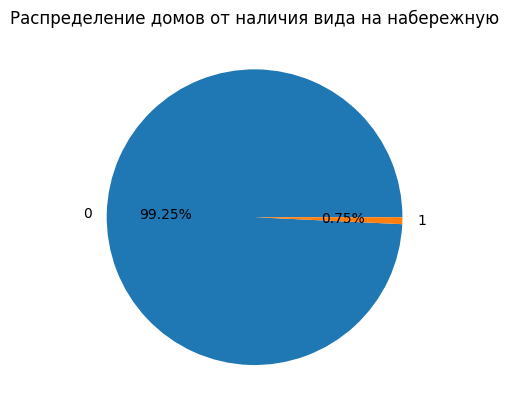

In [27]:
plt.pie(WaterfrontView, labels=WaterfrontView.index, autopct='%.2f%%')
plt.title('Распределение домов от наличия вида на набережную');

Вывод:большая часть домов не имеет вида на набережную

## 2.2. Изучите распределение этажей домов

In [29]:
NumberOfFloors = df.floors.value_counts()
NumberOfFloors

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

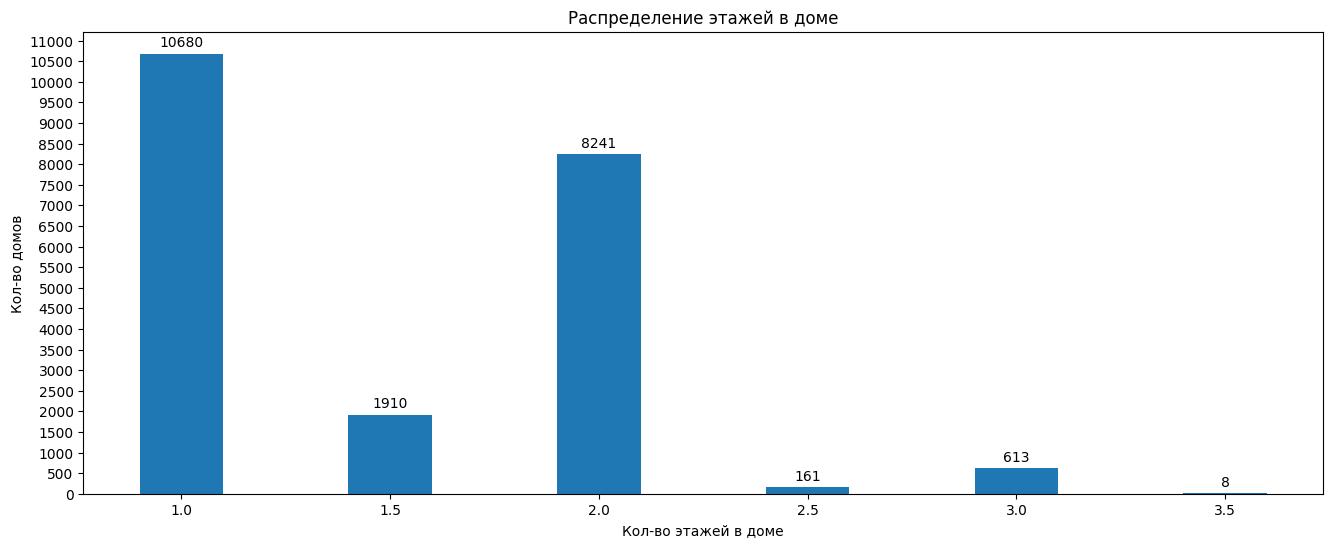

In [39]:
plt.figure(figsize=(16,6))
bars = plt.bar(NumberOfFloors.index, NumberOfFloors, width=0.2)
plt.title('Распределение этажей в доме')
plt.xlabel('Кол-во этажей в доме')
plt.ylabel('Кол-во домов')
plt.yticks(np.arange(0, 11001, 500))
plt.bar_label(bars, padding=3);

Вывод: в большей части домов 1 или 2 этажа

## 2.3. Изучите распределение состояния домов

In [41]:
ConditionValues = df.condition.value_counts()
ConditionValues

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

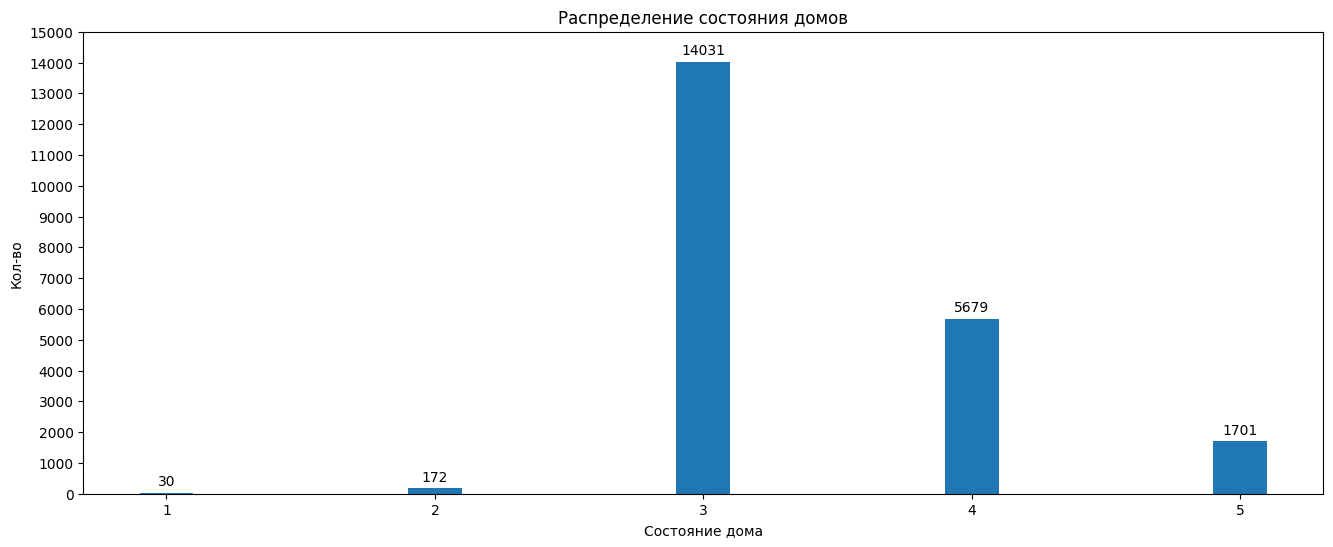

In [48]:
plt.figure(figsize=(16,6))
bars = plt.bar(ConditionValues.index, ConditionValues, width=0.2)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во')
plt.bar_label(bars, padding=3)
plt.yticks(np.arange(0, 15001, 1000));

Вывод: большинство домов находятся в удовлетворительном или хорошем состоянии

# 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.\
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Определяем зависимости между признаками с помощью матрицы корреляций

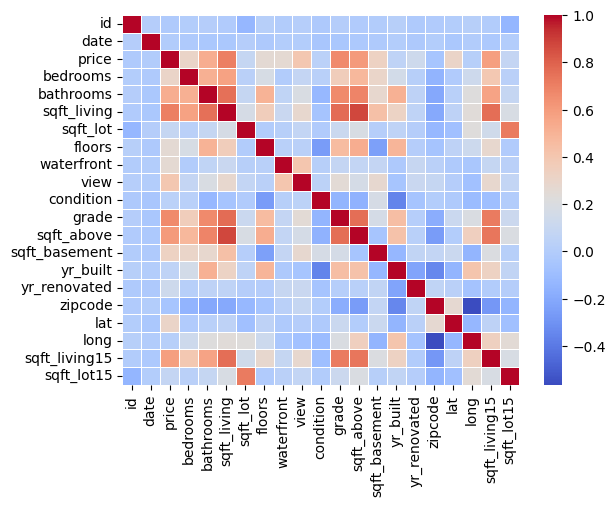

In [66]:
CorrMatrix = df.corr()
sns.heatmap(CorrMatrix, cmap='coolwarm', linewidths=0.5);

Цена дома сильно зависит от жилой площади

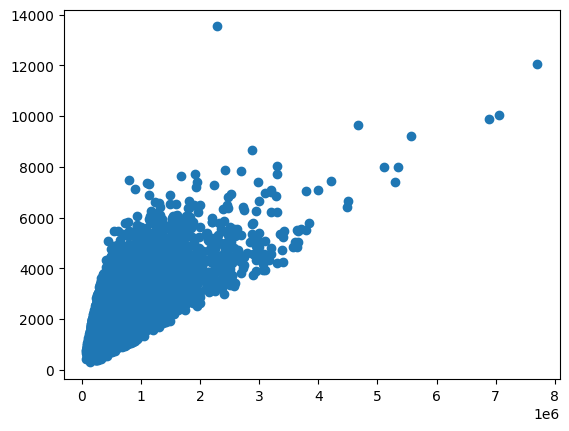

In [62]:
plt.scatter(df['price'], df['sqft_living']);

Цена умеренно зависит от оценки дома

In [73]:
PriceOnGrade = df[['price', 'grade']].groupby('grade').agg({'price': 'median'})
PriceOnGrade


,price
grade,
1,142000.0
3,262000.0
4,205000.0
5,228700.0
6,275276.5
7,375000.0
8,510000.0
9,720000.0
10,914327.0


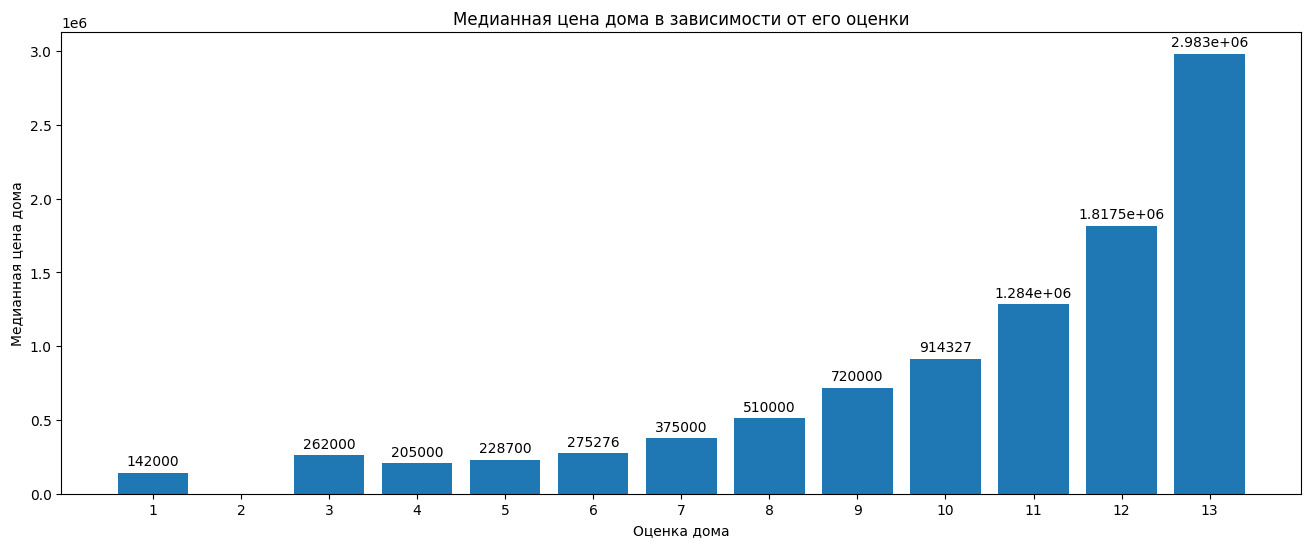

In [82]:
plt.figure(figsize=(16,6))
bars = plt.bar(PriceOnGrade.index, PriceOnGrade['price'])
plt.title('Медианная цена дома в зависимости от его оценки')
plt.xlabel('Оценка дома')
plt.ylabel('Медианная цена дома')
plt.bar_label(bars, padding=3)
plt.xticks(np.arange(1, 14));